In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# import scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# import modeling methods
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

## custome script imports
import acquire as a 
import prepare as p

### Acquiring Player Data

In [2]:
df = a.get_player_data() ## using our acquire functionn 

In [3]:
df.head() ## previewing our data

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22


#### Numerical Statistics Dataframe

In [4]:
stats_df = a.acquire_stats(df) ## using our custom function to output numerical statistics
## for the player stats dataframe

stats_df.head() ## previewing our numerical statistics dataframe

,count,mean,std,min,25%,50%,75%,max,range
total_maps,1869.0,435.231675,391.291072,100.00,152.00,271.00,592.00,2064.00,1964.0
total_rounds,1869.0,11399.083467,10298.045537,2348.00,3977.00,7076.00,15532.00,54137.00,51789.0
kd_diff,1869.0,180.254147,991.956591,-6238.00,-269.00,-32.00,352.00,8070.00,14308.0
kd,1869.0,0.996726,0.100515,0.63,0.93,0.99,1.06,1.43,0.8
rating,1869.0,0.985757,0.075545,0.68,0.94,0.99,1.03,1.28,0.6


#### Acquire Exploration: Data Types, Nulls, & Distributions

In [5]:
a.summarize_df(df) ## using our custom script function to look at data types and nulls

Info on Columns and Datatypes:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 0 to 1868
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1869 non-null   object 
 1   country       1869 non-null   object 
 2   teams         1869 non-null   object 
 3   total_maps    1869 non-null   int64  
 4   total_rounds  1869 non-null   int64  
 5   kd_diff       1869 non-null   int64  
 6   kd            1869 non-null   float64
 7   rating        1869 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 131.4+ KB
None
------------------------------------------------

Value Counts for country:

United States    204
Brazil           138
Australia        134
Denmark          120
Russia           118
                ... 
Lebanon            1
Italy              1
Azerbaijan         1
Ireland            1
Hong Kong          1
Name: country, Length: 72, dtype: int64
---------------

Doesn't look like we have a lot of observations if there are any null values we will need to consider filling them to retain as many observations as possible

Distribution of total_maps



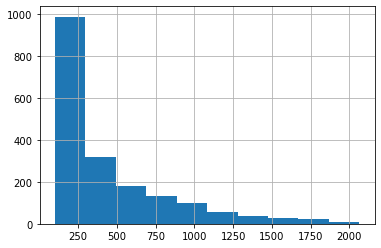

--------------------
Distribution of total_rounds



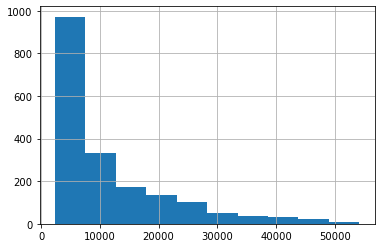

--------------------
Distribution of kd_diff



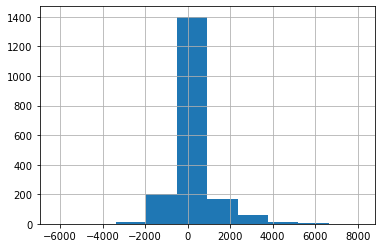

--------------------
Distribution of kd



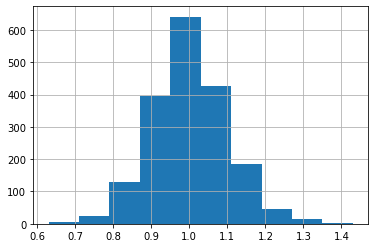

--------------------
Distribution of rating



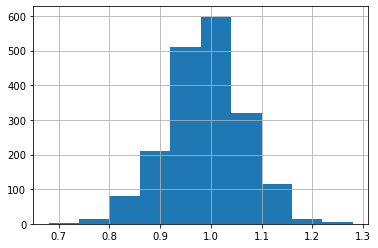

--------------------


In [6]:
## using our custom script funciton to look at distributions
a.univariate_distributions(df) 

The kd, kd diff, and rating of a player are relatively normally distributed.

The total maps and total rounds are tailing to the right.

### Preparing Player Stats

First we will double check to make sure we have no nulls or duplicates withing our data. Since we have such a small amount of observations we will want to fill these if they are among the data.

In [7]:
df.isnull().sum() ## checking for null values

name            0
country         0
teams           0
total_maps      0
total_rounds    0
kd_diff         0
kd              0
rating          0
dtype: int64

In [8]:
df.duplicated().sum() ## checking for duplicate rows.

0

Now we can confirm we don't have any null values or duplicate rows and carry forward with splitting the data.

#### Stripping Spaces from String Columns

In [9]:
df = p.strip_strings(df) ## using our strip string function to make sure the string valued
## columns are clean and ready for exploration and modeling

#### Train, Validate, Test Splitting Data

In [10]:
## using our data split function to split into train validate, & test dataframes

train, validate, test = p.split_data(df) 

Making Sure Our Shapes Look Good
Train: (1046, 8), Validate: (449, 8), Test: (374, 8)


In [14]:
train.head() ## previewing train

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
875,s0m,United States,"['Gen.G', 'Gen.G', 'Envy', 'Naventic']",358,9528,28,1.00,0.99
1507,S0tF1k,Russia,"['Spirit', 'Spirit', 'Espada']",1274,33567,-1878,0.92,0.92
739,pounh,Lithuania,"['Playing Ducks', 'Imperial', '1337HUANIA']",401,10552,91,1.01,1.00
1719,torben,Denmark,['Fragsters'],532,13939,-1196,0.87,0.88
593,TENZKI,Denmark,"['Nordavind', 'Dignitas', 'Rogue']",1469,38637,1372,1.05,1.02


In [13]:
validate.head() ## previewing validate

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
817,ALEX,United Kingdom,"['LDLC', 'LDLC', 'Vitality']",1040,27531,-248,0.99,1.00
1392,DomiNate,Sweden,"['Publiclir.se', 'ArchAngels']",187,4922,-238,0.93,0.94
1648,sycrone,Denmark,"['Sprout', 'North Academy', 'Tricked', 'Team123']",553,14608,-978,0.90,0.90
804,cromen,Norway,['Nordavind'],653,17335,67,1.01,1.00
133,mixwell,Spain,"['OpTic', 'Movistar Riders']",840,21804,1911,1.13,1.09


In [15]:
test.head() ## previewing test

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1121,SEMINTE,Romania,"['Nexus', 'XPC']",607,15872,-366,0.97,0.97
582,MoeycQ,Australia,"['Immunity', 'Chiefs', 'Ground Zero', 'AVANT']",613,15920,410,1.04,1.02
43,zAAz,Sweden,"['Secret fe', 'Besiktas', 'Bad Monkey']",227,5502,606,1.16,1.13
898,Drone,United States,"['Splyce', 'Envy']",454,11841,-168,0.98,0.99
1083,b0bbzki,Sweden,"['Singularity', 'Gatekeepers', 'fightclub']",278,7248,-240,0.95,0.97
